## Exercise 1 (1 points)

The files "positive_words.txt" and "negative_words.txt" contain mannually curated positive (e.g., good, great, awesome) and negative words (e.g., bad, hate, terrible). The files contain one word on each line. Write a function that takes the open file and adds the words (i.e., each line) to a set then returns it.

**Note:** You should use ".strip()" to remove the newline character from the end of each word. 

In [25]:
# Write code here

def file_to_set(file):
    """
    This function should take a file handler as input and return a set.
    
        Parameters:
            - file file handle: This variable is a file handle
            
        Return:
            - The file should return a set (e.g., {'good', 'great', 'happy'})
    """
    word_set = set()
    
    for word in file:
        word_set.add(word.strip())

    return word_set # You should return a set

positive_file = open('./bing_liu/positive-words.txt', encoding='utf8')
positive_words = file_to_set(positive_file)
positive_file.close()

negative_file = open('./bing_liu/negative-words.txt', encoding='iso-8859-1') # If you get a weird read error. Let me know. We can change the encoding.
negative_words = file_to_set(negative_file)
negative_file.close()

The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [26]:
assert(type(positive_words) == type(set()))
assert(type(negative_words) == type(set()))
assert(len(positive_words) == 2006)
assert(len(negative_words) == 4783)
assert(('good' in positive_words)  == True)
assert(('bad' in negative_words)  == True)
assert(('bad' not in positive_words) == True)
print("Asserts finished successfully!")

Asserts finished successfully!


## Exercise 2 (1 points)

For this exercise, you need to write a function that counts the number of words in a sentence that also appear in a set. For example, given the set set(['good', 'great']) and the sentence "this is good good good", the function should return 3.

**Hint:** You can check if something is in a set using the following notation:

```python
mySet = set(["a", "b", "c"])
otherList = ["c", "d"]
for letter in otherList:
    if letter in mySet:
        print(letter)
```

The above code will print "c".

In [41]:
def count_sentiment_words(sentiment_set, tweet_text, lower):
    """
    This function takes a set and string as input, then counts the number of words that 
    appear in the string (tweet_text) that are also in the set (sentiment_set). The
    tweet_text should be normalized based on the lower argument (i.e., lowercase if True)
    
        Parameters:
            - sentiment_set set: A set of sentiment words, e.g., {'good', 'great', 'happy'}
            - tweet_text string: A tweet, e.g., "I go to UTSA!!!"
            - lower bool: A True or False boolean value indicating the tweet_text should be lowercased
    """
    word_count = 0
    
    for word in tweet_text.split():
        if word in sentiment_set:
            word_count += 1
    
    return word_count #You should return a number

The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [42]:
assert(count_sentiment_words(positive_words, "this is a good good good class", True) == 3)
assert(count_sentiment_words(positive_words, "this is a good\tgood\tgood class", True) == 3)
assert(count_sentiment_words(positive_words, "this is a GOOD GOOD GOOD class", False) == 0)
assert(count_sentiment_words(positive_words, "this is a GOOD GOOD good class", False) == 1)
assert(count_sentiment_words(positive_words, "Python is the best programming language for data science", True) == 1)
assert(count_sentiment_words(negative_words, "R is bad compared to Python ;)", True) == 1)
print("Asserts finished successfully!")

Asserts finished successfully!


## Exercise 3 (1 point)

For this exercise, you will write a function that takes two numbers as input and returns a string. Intuitively, this is a basic classification function for lexicon-based sentiment classification. 

The function should take as input parameters the the number of positive (num_pos_words) and negative (num_neg_words) words in each tweet to predict sentiment. If the number of positive words is greater than to the number of negative tweets (num_pos_words > num_neg_words), then predict **"positive"**. If the number of negative words is greater than the number of positive words (num_neg_words > num_pos_words), then predict **"negative"**. If both num_pos_words and num_neg_words are equal (num_neg_words = num_pos_words), predict **"neutral"**. This is known as lexicon-based classification.


In [53]:
def predict(num_pos_words, num_neg_words):
    """
    This function should return the string "positive", "negative", or "neutral" given
    the input parameters, i.e., if num_pos_words is greater than num_neg_words, return "positive"
    
        Parameters:
            - num_pos_words int: This is a count representing the number of positive words in a tweet.
            - num_neg_words int: This is a count representing the number of negative words in a tweet.
            
        Return:
            - Return a string "positive", "negative", or "neutral"
    """
    result = ['positive', 'negative', 'neutral']
    
    if num_pos_words - num_neg_words > 0:
        return result[0]
    elif num_pos_words - num_neg_words < 0:
        return result[1]
    else:
        return result[2]

The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [54]:
assert(predict(2, 5) == 'negative')
assert(predict(5, 2) == 'positive')
assert(predict(3, 3) == 'neutral')
print("Assert finished successfully!")

Assert finished successfully!


## Exercise 4 (1 point)

This exercise is similar to Exercise 3. However, instead of making a prediction, we should write a function that returns a sentiment score. Specifically, assume num_pos_words is 3 and num_neg_words is 4, the function should return -1. The idea is that the more *positive* the number, the more positive the sentiment. Likewise, the more *negative* the number, the more negative the sentiment.

In [47]:
def predict_score(num_pos_words, num_neg_words):
    """
    This function should generate a sentiment score num_pos_words - num_neg_words.
    
        Parameters:
            - num_pos_words int: This is a count representing the number of positive words in a tweet.
            - num_neg_words int: This is a count representing the number of negative words in a tweet.
            
        Return:
            - Return an integer representing the difference between positive words and negative words.
    """
    sentiment_score = int(num_pos_words - num_neg_words)
    
    return sentiment_score

The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [48]:
assert(predict_score(3, 1) == 2)
assert(predict_score(2, 2) == 0)
assert(predict_score(2, 5) == -3)
print("Asserts finished successfully!")

Asserts finished successfully!


## Exercise 5 (1 point)

Write a function that takes a json string as input and returns a Python object. Hint: This can be one line. You can use the json library.

In [66]:
import json

def json_string_to_dictionary(json_string):
    """
    This function should take a json string and convert it into a Python object (hint: loads)
    
        Parameters:
            - json_string str: A json string, e.g., '{"a": 1}'
            
        Returns:
            - Return a python object, e.g., {"a": 1} <--- look no quotes, so this is a dictionary
    """
    result = json.loads(json_string)
    return result

The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [67]:
data = json_string_to_dictionary('{"a": 1}')
assert(data == {'a': 1})
data = json_string_to_dictionary('[1,2,3]')
assert(data == [1,2,3])
print("Assert finished successfully!")

Assert finished successfully!


## Exercise 6 (3 points)

For this task, we combine the functions written for the previous exercises to classify all of the tweets in a real Twitter dataset. You should write code that does the following:
1. Keeps track of the number of tweets
2. Keeps track of the number of positive and negative tweets
3. Keeps track of the user that tweets the most
4. Keeps track of the total number of unique users
5. Keeps track of the average number of tweets per user (how many tweets does each user make, on average)
6. Keeps track of the most positive and negative tweets.

Note: This task depends on Exercises 1 through 5. You will need to complete them first. Also, do **not** store all of the tweets in a list.  This will use too much memory because of the size of the dataset. It is okay to store all of the user's screen names.

Finally, the dataset is big! So, I recommend working on a subset of the dataset to make sure your code works, i.e., you could "break" after the first 100 lines.



In [84]:
total_number_of_tweets = 0
total_number_of_positive_tweets = 0
total_number_of_negative_tweets = 0
total_number_of_users = 0
max_tweets = 0
user_with_most_tweets = ''
most_positive_tweet = ''
most_negative_tweet = ''
average_number_tweets_per_user = 0
unique_users = {}
total_number_of_neutral_tweets = 0
user_scores = {}
max_score = 0
min_score = 0

twitter_dataset = open('puerto-rico.jsonl', 'r')

for row in twitter_dataset:
    tweet_dict = json_string_to_dictionary(row)
    
    ###############################
    
    tweet_text = tweet_dict['full_text'] # MODIFY THIS LINE TO GET THE "full_text" from the tweet_dict
    screen_name = tweet_dict['user']['screen_name'] # MODIFY THIS LINE TO GET THE "screen_name" from the tweet_dict
    
    ###############################
    
    num_pos_words = count_sentiment_words(positive_words, tweet_text, True)
    num_neg_words = count_sentiment_words(negative_words, tweet_text, True)
    
    sentiment_prediction = predict(num_pos_words, num_neg_words)
    sentiment_score = predict_score(num_pos_words, num_neg_words)
    
    ################################
    
    #   1. Keep track of the number of tweets
    total_number_of_tweets += 1
        
    #   2. Keep track of the number of positive and negative tweets
    if sentiment_prediction == 'positive':
        total_number_of_positive_tweets += 1
    elif sentiment_prediction == 'negative':
        total_number_of_negative_tweets += 1
    else:
        total_number_of_neutral_tweets += 1
    
    #   4. Keep track of the total number of unique users
    unique_users[screen_name] = unique_users.get(screen_name, 0) + 1
    
    #   6. Keep track of the most positive and negative tweets.
    user_scores[tweet_text] = user_scores.get(tweet_text, 0) + sentiment_score
        
    ################################

# Total Count of Unique Users
total_number_of_users = len(unique_users)    
    
#   3. Keep track of the user that tweets the most
for k,v in unique_users.items():
    if v > max_tweets:
        max_tweets = v
        user_with_most_tweets = k

#   5. Keep track of the average number of tweets per user (how many tweets does each user make, on average)
average_number_tweets_per_user = total_number_of_tweets / total_number_of_users
        
# Most Positive and Negative Tweets
for k,v in user_scores.items():
    if v > max_score:
        max_score = v
        most_positive_tweet = k
    if v < min_score:
        min_score = v
        most_negative_tweet = k

twitter_dataset.close()

In [85]:
print("Total Number of Tweets: {}".format(total_number_of_tweets))
print("Total Number of Positive Tweets: {}".format(total_number_of_positive_tweets))
print("Total Number of Negative Tweets: {}".format(total_number_of_negative_tweets))
print("Total Number of Neutral Tweets: {}\n".format(total_number_of_neutral_tweets))

print("Most Positive Tweet")
print(most_positive_tweet)
print()

print("Most Negative Tweet")
print(most_negative_tweet)
print()

print("Total Number of Users: {}".format(total_number_of_users))
print("Average Number of Tweets per User: {}".format(average_number_tweets_per_user))
print("User with the most tweets: {}".format(user_with_most_tweets))

Total Number of Tweets: 737153
Total Number of Positive Tweets: 139453
Total Number of Negative Tweets: 173638
Total Number of Neutral Tweets: 424062

Most Positive Tweet
RT @realDonaldTrump: It was great to have Governor @RicardoRossello of #PuertoRico🇵🇷with us at the @WhiteHouse today. We are with you! #PRS…

Most Negative Tweet
RT @EduSamani: IMPORTANT UPDATES ABOUT PUERTO RICO: Hundreds of nurses are pouring in to help and they are reporting terrible conditions ac…

Total Number of Users: 286975
Average Number of Tweets per User: 2.5687011063681506
User with the most tweets: Noti_PuertoRico


The lines below give example inputs and correct outputs using asserts, and can be run to test the code. Passing these tests is necessary, but **NOT** sufficient to guarantee your implementation is correct. You may add additional test cases, but do not remove any tests.

In [86]:
assert(isinstance(total_number_of_tweets, int) or isinstance(total_number_of_tweets, float))
assert(isinstance(total_number_of_positive_tweets, int) or isinstance(total_number_of_positive_tweets, float))
assert(isinstance(total_number_of_negative_tweets, int) or isinstance(total_number_of_negative_tweets, float))
assert(isinstance(total_number_of_neutral_tweets, int) or isinstance(total_number_of_neutral_tweets, float))
assert(isinstance(most_positive_tweet, str))
assert(isinstance(most_negative_tweet, str))
assert(isinstance(user_with_most_tweets, str))
assert(total_number_of_tweets == 737153)
print("Assert finished successfully!")

Assert finished successfully!


## Exercise 7 (2 points)

For this exercise, you will perform manual analysis of the predictions. Modify the code to load the tweet text, then answer the questions below.

In [87]:
import json
twitter_dataset = open('puerto-rico.jsonl', 'r')

num_tweets_to_print = 20

num_tweets = 0

for row in twitter_dataset:
    num_tweets += 1
    tweet_dict = json_string_to_dictionary(row)
    
    ###############################
    # YOUR CODE HERE
    tweet_text = tweet_dict['full_text'] # MODIFY THIS LINE TO GET THE "full_text" from the tweet_dict    
    ###############################
    
    num_pos_words = count_sentiment_words(positive_words, tweet_text, True)
    num_neg_words = count_sentiment_words(negative_words, tweet_text, True)
    
    sentiment_prediction = predict(num_pos_words, num_neg_words)
    
    print("Tweet {}: {}".format(num_tweets, tweet_text))
    print("Tweet {} Prediction: {}".format(num_tweets, sentiment_prediction))
    print()
    
    if num_tweets == num_tweets_to_print:
        break
    
twitter_dataset.close()

Tweet 1: RT @TheSWPrincess: @bri_sacks To find out how to help, visit the site below. Virgin Islanders are not getting the media attention that #Pue…
Tweet 1 Prediction: neutral

Tweet 2: I have yet to be able to express my thoughts without expletives about @realDonaldTrump + Hurricane Maria recovery #PuertoRico
Tweet 2 Prediction: positive

Tweet 3: RT @TalbertSwan: @TaIbertSwan @realDonaldTrump “Sire, the people don’t have power, food, or water!” 

#Trump: “Let them eat paper towels!”…
Tweet 3 Prediction: neutral

Tweet 4: RT @NYPDSpecialops: #NYPD ESU K9 “Harley” &amp; “Nash” deployed as part @fema NY-TF1 have been hard at work assisting in the #PuertoRico rescue…
Tweet 4 Prediction: neutral

Tweet 5: RT @StarrMSS: .@elvisduran gave 30K to @Bethenny to charter  plane to bring supplies to #PuertoRico #HurricaneMaria. He also gave 100K to @…
Tweet 5 Prediction: neutral

Tweet 6: RT @ericbolling: When will @realDonaldTrump catch a break from fake news outrage? Very unfair slams over #P

Complete the following tasks:
 
- Manually annotate all of the tweets printed above:
   1. Tweet 1 Annotation Here: **Negative** / different
   1. Tweet 2 Annotation Here: **Negative** / different
   1. Tweet 3 Annotation Here: **Negative** / different
   1. Tweet 4 Annotation Here: **Positive** / different
   1. Tweet 5 Annotation Here: **Neutral**
   1. Tweet 6 Annotation Here: **Negative**
   1. Tweet 7 Annotation Here: **Neutral**
   1. Tweet 8 Annotation Here: **Positive** / different
   1. Tweet 9 Annotation Here: **Negative**
   1. Tweet 10 Annotation Here: **Positive** / different
   1. Tweet 11 Annotation Here: **Positive**
   1. Tweet 12 Annotation Here: **Negative** / different
   1. Tweet 13 Annotation Here: **Positive** / different
   1. Tweet 14 Annotation Here: **Neutral**
   1. Tweet 15 Annotation Here: **Neutral**
   1. Tweet 16 Annotation Here: **Neutral**
   1. Tweet 17 Annotation Here: **Positive**
   1. Tweet 18 Annotation Here: **Negative** / different
   1. Tweet 19 Annotation Here: **Neutral**
   1. Tweet 20 Annotation Here: **Negative** / different

- How many of the predictions are right or wrong compared to your annotations?
    
    **Compared to my annotations. 50% of the predictions were wrong (10 out of 20).**
    
- Do you see any major limitations of lexicon-based classificaiton (i.e., making sentiment predictions using individual words)? Use your intuition, I will accept most answers, as long as it makes some sense. Please describe and provide examples below:

    **Making predictions using individual words can lead to innacurate categorization on the sentiment of phrases stripped out of twitter posts. The efficacy of single words needs to be enhanced so that the context of the text being analyzed is better assessed by the Python program. An example of a way to improve the efficacy of the lexicon is to use words that are more specific to the data being analyzed.**

## Extra Credit (2 points)

For this exercise, you should use a different dataset (email me if you want me to share a dataset with your directly, or you can use your own---see below for dataset resources) and analyze it with a different (non-sentiment) lexicon. You can complete the same analysis as above, or do something different as long as you make use of a new lexicon and a new dataset. Notice some lexicons only have one class, or more than 2 classes. The processing will be slightly different. Feel free to ask how this can be done via Slack.

Possible lexicons:
- Hate speech and offensive language lexicons:
    - https://github.com/steve050798/hate-speech-and-offensive-language/raw/master/lexicons/hatebase_dict.csv
    - https://www.cs.cmu.edu/~biglou/resources/bad-words.txt
- Mental (Health) Lexicons    
    - Anxiety Lexicon
        - https://github.com/lrheault/anxiety
    - Depression Lexicon
        - https://github.com/halolimat/Social-media-Depression-Detector
    - Abuse Lexicon
        - https://github.com/uds-lsv/lexicon-of-abusive-words
        
You may use one of the lexicons above or another non-sentiment lexicon of your choice. I may allow another sentiment lexicon if the new analysis is interesting; however, email me before doing this. An example would be using a Spanish sentiment lexicon to analyze Spanish text, or doing a different analysis than the one abouve (e.g., anayzing sentiment over time).

Where to look for new data?
- https://www.kaggle.com
- https://www.docnow.io/catalog/ (Some datasets contain the text, not just tweet ids). If you have something specific you want, I can grab it for you using my developer account.
- Google :). You do not need to use tweets.

You can pull new data from Twitter, but you will need to create a developer account. The easiest way to pull new data is via the use of Twarc (https://github.com/DocNow/twarc).

Finally, when you submit, I don't need to have your data, just make sure to provide a couple of examples, a link to the data (if available), and make sure all of the output of your code is printed with the output so I can analyze it.

## Sentiment Analysis on Company News Article Headings Scraped from Finviz.com 

#### **Scrape Finviz for AAPL News Article Headings and Create a Dataframe**

In [92]:
#Packages
import pandas as pd
import csv
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

stock = 'AAPL'
finviz_url = f'https://finviz.com/quote.ashx?t={stock}'

req = Request(url = finviz_url, headers = {'user-agent': 'my-analysis'})
response = urlopen(req)
html = BeautifulSoup(response, 'html')

news_tables = {}
news_table = html.find(id = 'news-table')
news_tables[stock] = news_table

stock_data = news_tables[stock]
stock_rows = stock_data.findAll('tr')

parsed_data = []

for stock, news_table in news_tables.items():
    for row in news_table.findAll('tr'):   
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append([stock, date, time, title])

news_df = pd.DataFrame(parsed_data, columns = ['stock', 'date', 'time', 'heading'])

In [94]:
#View first four rows
news_df.head()

stock       date       time  \
0  AAPL  Mar-12-21  06:02PM     
1  AAPL  Mar-12-21  05:45PM     
2  AAPL  Mar-12-21  05:45PM     
3  AAPL  Mar-12-21  03:20PM     
4  AAPL  Mar-12-21  02:50PM     

                                             heading  
0  These Are The Best Robinhood Stocks To Buy Or ...  
1  Apple (AAPL) Stock Sinks As Market Gains: What...  
2  How to Play the Valuation Gap Between Growth a...  
3  Apple is a force for good, Facebook not so muc...  
4  Is Apple Stock A Buy Ahead Of Possible Spring ...

#### **Perform Sentiment Analysis with Vader Lexicon**

In [104]:
#Package
from nltk.sentiment.vader import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()
lambda_func = lambda title: vader.polarity_scores(title)['compound']

news_df['compound score'] = news_df['heading'].apply(lambda_func)
news_df['date'] = pd.to_datetime(news_df.date).dt.date

In [96]:
#View first four rows
news_df.head()

stock        date       time  \
0  AAPL  2021-03-12  06:02PM     
1  AAPL  2021-03-12  05:45PM     
2  AAPL  2021-03-12  05:45PM     
3  AAPL  2021-03-12  03:20PM     
4  AAPL  2021-03-12  02:50PM     

                                             heading  compound score  
0  These Are The Best Robinhood Stocks To Buy Or ...          0.6369  
1  Apple (AAPL) Stock Sinks As Market Gains: What...          0.3400  
2  How to Play the Valuation Gap Between Growth a...          0.7506  
3  Apple is a force for good, Facebook not so muc...          0.4404  
4  Is Apple Stock A Buy Ahead Of Possible Spring ...          0.0000

In [99]:
#Average Compound Score 
score_count = 0
comp_score = 0

for score in news_df['compound score']:
    comp_score += score
    score_count += 1

average_comp_score = comp_score / score_count
print(f"The average_comp_score for {stock} is {average_comp_score}")

The average_comp_score for AAPL is 0.076643


#### **What This Means**

Per the Vader documentationm, the compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). In the case above, the average compound score is 0.076643, meaning that AAPL is leaning towards having positive sentiment based on the text within the Finviz news article headings.

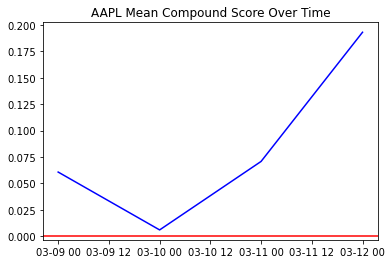

In [107]:
#Package
import matplotlib.pyplot as plt

mean_df = news_df.groupby(['date']).mean()
plt.plot(mean_df, color = 'blue')
plt.title(f"{stock} Mean Compound Score Over Time")
plt.axhline(0, color = 'red')
plt.savefig(f'08. {stock} Compund Score.png',format='png', dpi = 200, bbox_inches = 'tight', orientation = 'landscape')